# Ecuaciones no lineales

Dada $f:\mathbb{R}\to\mathbb{R}$, se plantea el problema de hallar $\alpha \in \mathbb{R}$ tal que:

$$f(\alpha) = 0.$$

En general, $f$ es cualquier función, por lo que no necesariamente es posible "despejar" $\alpha$. Debemos hallar la solución a lo anterior numéricamente.

A modo de ejemplo, consideremos la función:

$$f(x) = x\log(x) - x$$

con $x>0$.


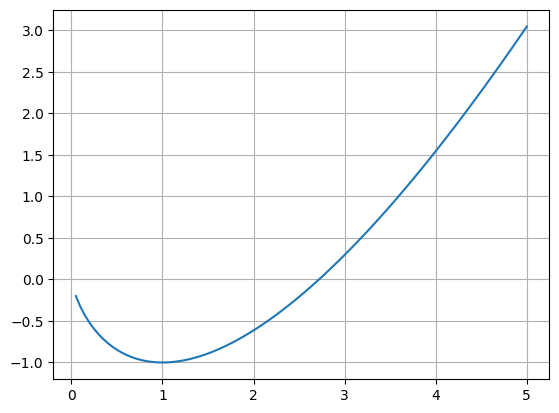

In [4]:
using PyPlot #paquete de graficos

#defino la función a utilizar
function f(x)
    return x.*log.(x) - x;
end;

xx=(0.05:.05:5) #defino un intervalo de trabajo.

plot(xx,f(xx))
grid()


## Método de bisección

Este método simple se basa en el Teorema de Bolzano. Si $f$ continua y $f(a)f(b)<0$ con $a<b$ entonces existe $c\in(a,b)$ tal que $f(c)=0$. El algoritmo es entonces:

1. Elijo $a_0,b_0$ tal que $f(a_0)f(b_0)<0$.
2. En el paso $k$, tomo $c_k = \frac{a_k+b_k}{2}$.
3. Si $f(a_k)f(c_k)<0$, tomo $a_{k+1}=a_k, b_{k+1} = c_{k}$. Si en cambio $f(c_k)f(b_k)<0$, tomo $a_{k+1}=c_k, b_{k+1} = b_k$.
4. Tomo $k\leftarrow k+1$ y vuelvo a 2.

En cada paso, el intervalo $[a_k,b_k]$ contiene una raíz, y podemos considerar $c_k$, el centro del intervalo, como su estimación.

## Criterio de parada

El algoritmo anterior debe completarse con un *criterio de parada*. Algunos posibles criterios son:

* El error (relativo) de la estimación es menor a cierta tolerancia $tol_1$.
* El valor de la función en el punto es cercano a $0$ a menos de cierta tolerancia $tol_2$.
* El no. de iteraciones realizadas supera un cierto valor $maxiter$.

## Implementación

In [20]:
#Implemento el método de bisección. Los parámetros son la función, el intervalo inicial [a0,b0], las tolerancias de error y el máximo no. de iteraciones.
#Devuelve la estimación de la raíz, el no. de iteraciones requeridas y la estimación del error en cada paso.

function biseccion(f,a0,b0,tol1,tol2,maxiter)

    #condicion inicial
    a=a0;
    b=b0;
    c=(a0+b0)/2.0;
    
    k=0
    err1=Inf;
    err2=Inf;

    #inicializo vectores vacíos para ir completando
    E1=Array{Float64}[];
    E2=Array{Float64}[];

    while err1>tol1 && err2>tol2 && k<maxiter
        
        fc = f(c);
    
        if f(a)*fc<0
            b=c;
        elseif f(b)*fc<0
            a=c;
        end
    
        c=(a+b)/2.0;
    
        err1 = abs((c-a))
        err2 = abs(f(c));
    
        #guardo los errores para graficar
        E1 = [E1;err1];
        E2 = [E2;err2];

        k=k+1;
    
    end
    
    return c,k,E1,E2
end

biseccion (generic function with 1 method)

In [33]:
a=1.0;
b=5.0;
tol1=1e-10;
tol2=0;
maxiter=100;
    
x,k,E1,E2 = biseccion(x->x^2-2,a,b,tol1,tol2,maxiter)

println("Estimación de la raíz: $x")
println("Error final 1: $(E1[end])")
println("Error final 2: $(E2[end])")
println("No. iteraciones: $k")

Estimación de la raíz: 1.4142135623260401
Error final 1: 5.820766091346741e-11
Error final 2: 1.3309153779061944e-10
No. iteraciones: 35


In [25]:
x, f(x)

(2.7182818284491077, -9.937828338024701e-12)

## Evolución del error

Queremos analizar ahora la evolución del error. Sea $x_k$ la estimación de la raíz en el paso $k$ (en el algoritmo anterior, el centro del intervalo). Definamos:

$$E_k = |x_k-\alpha|.$$

Es fácil ver que, en el método de la bisección:

$$E_k = |x_k - \alpha| \leqslant |b_k-a_k|/2$$.

Siendo $a_k,b_k$ los extremos del intervalo en el paso $k$. Por lo tanto:

$$E_{k+1} = |x_{k+1} - \alpha| \leqslant |b_{k+1}-a_{k+1}|/2 = |b_{k}-a_{k}|/4 = E_{k}/2$$.

Es decir, el error cometido se reduce a la mitad en cada paso. Siguiendo con la recursión obtenemos:

$$E_k \leqslant E_{k-1}/2 \leqslant E_{k-2}/2^2 \leqslant \ldots \leqslant E_0/2^k.$$ 

El error decae entonces de manera geométrica, con razón $1/2$.

### Error en escala logarítmica

Para ver lo anterior, conviene graficar la evolución del error en escala logarítmica contra el no. de pasos.

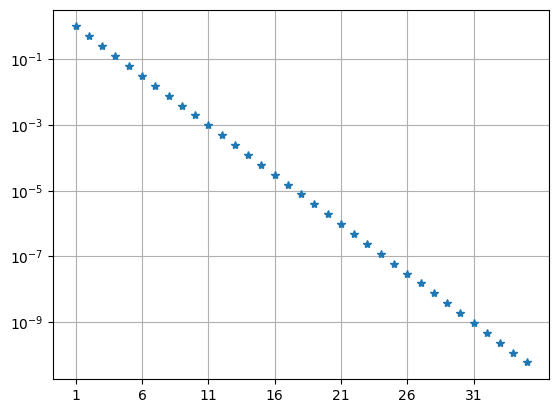

In [30]:
semilogy((1:k),E1,"*")
xticks(1:5:k)
grid()

En escala logarítmica, el error se ve como una recta ya que:

$$\log(E_k) \approx \log(E_{k-1}/2) = \log(E_{k-1}) - \log(2).$$

Es decir, en cada paso, el logaritmo del error baja una constante ($\log(2)$ en este caso). Por lo tanto:

$$\log(E_{k}) \approx \log(E_0) - k\log(2).$$

## Orden de un método iterativo de cálculo de raíces.

> **Definición:** Para un método iterativo en el que $E_k\to 0$ (es decir, converge a la solución), decimos que el método es de *orden* $p$ con *constante* $c$ si existe el límite:
>
> $$\lim_{k\to\infty} \frac{E_{k+1}}{E_{k}^p} = c$$
>
> con $0<c<\infty$

Interpretación: a medida que hacemos iteraciones, $E_{k+1} \approx c E_k^p$.

### Ejemplo:

En bisección $E_{k+1}\approx \frac{1}{2} E_k$ por lo que $p=1$ y $c=1/2$. Decimos que es un método *lineal* o de *orden 1*.

### Comparación de métodos:

* Si dos métodos iterativos $1$ y $2$ tienen órdenes $p_1>p_2$, entonces el método $1$ converge más rápido.
* Si dos métodos iterativos $1$ y $2$ tienen órdenes $p_1=p_2$, y además $c_1<c_2$, entonces el método $1$ converge más rápido. 

## Ejercicio:

Considere el método denominado *Regula Falsi*. En este método, a partir de un intervalo $[a,b]$ que contiene una raíz, se estima la misma como la raíz de la recta que pasa por $(a,f(a))$ y $(b,f(b))$. Sea $c$ dicho punto. Aplicando la misma idea de bisección, itere el procedimiento anterior hasta hallar la raíz de la función.

Compare el error cometido al utilizar este método para la función anterior con el error en bisección. Muestre gráficamente que este método es del mismo orden, pero levemente más rápido. Estime la constante del método.